In [1]:
import tensorflow as tf
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from flows import *

import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
mc = np.load("../data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

sim_pt =  mc['sim_jets'][:, 0]
sim_eta = mc['sim_jets'][:, 1]
sim_phi = mc['sim_jets'][:, 2]
sim_m =   mc['sim_jets'][:, 3]

sim = np.vstack([sim_pt, sim_eta, sim_phi, sim_m]).T

In [4]:
data = np.load("../data/zenodo/Herwig_Zjet_pTZ-200GeV_0.npz")

dat_pt =  data['sim_jets'][:, 0]
dat_eta = data['sim_jets'][:, 1]
dat_phi = data['sim_jets'][:, 2]
dat_m =   data['sim_jets'][:, 3]

dat = np.vstack([dat_pt, dat_eta, dat_phi, dat_m]).T

In [5]:
n, d = dat.shape

In [6]:
dat_target = make_target(d)
sim_target = make_target(d)

dat_ckpt = tf.train.Checkpoint(dat_target)
sim_ckpt = tf.train.Checkpoint(sim_target)

2022-12-15 06:19:27.871526: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 06:19:28.495606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20698 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:41:00.0, compute capability: 7.5


In [7]:
dat_ckpt.restore('sim/ckpt-48528')
sim_ckpt.restore('sim/ckpt-48528')

In [8]:
dat_smp = dat_target.sample(n)
sim_smp = sim_target.sample(n)

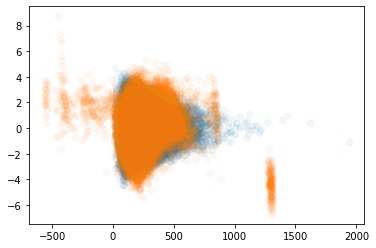

In [9]:
plt.scatter(dat[:, 0], dat[:, 1], alpha = 0.05)
plt.scatter(dat_smp[:, 0], dat_smp[:, 1], alpha = 0.05)

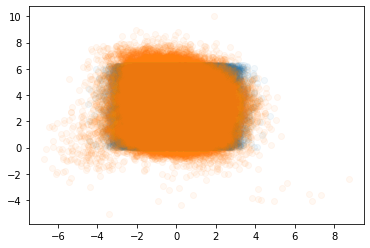

In [10]:
plt.scatter(dat[:, 1], dat[:, 2], alpha = 0.05)
plt.scatter(dat_smp[:, 1], dat_smp[:, 2], alpha = 0.05)

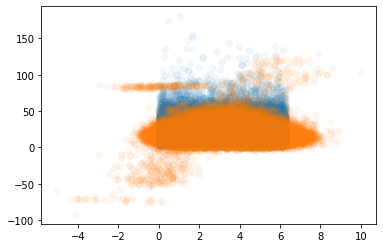

In [11]:
plt.scatter(dat[:, 2], dat[:, 3], alpha = 0.05)
plt.scatter(dat_smp[:, 2], dat_smp[:, 3], alpha = 0.05)

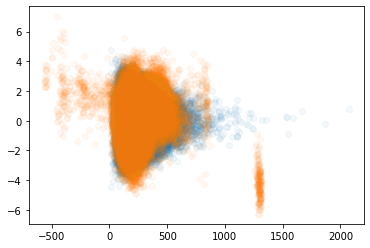

In [12]:
plt.scatter(sim[:, 0], sim[:, 1], alpha = 0.05)
plt.scatter(sim_smp[:, 0], sim_smp[:, 1], alpha = 0.05)

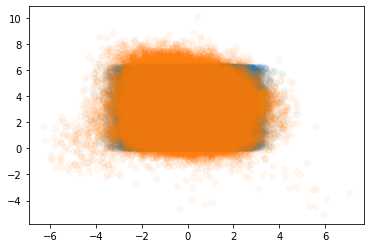

In [13]:
plt.scatter(sim[:, 1], sim[:, 2], alpha = 0.05)
plt.scatter(sim_smp[:, 1], sim_smp[:, 2], alpha = 0.05)

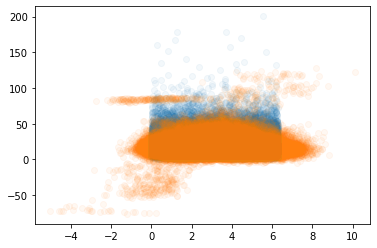

In [14]:
plt.scatter(sim[:, 2], sim[:, 3], alpha = 0.05)
plt.scatter(sim_smp[:, 2], sim_smp[:, 3], alpha = 0.05)

In [15]:
n_max = 30000

for n in range(1, n_max, 30001):
    print(n)

SyntaxError: incomplete input (2275393708.py, line 4)

In [ ]:
[i for i in range(1, 30000, 100)]